# IMPORTING LIBRARIES AND SETUP

In [1]:
# %pip install torch torchvision matplotlib pandas
# %pip install tqdm

In [2]:
# ## clone the Repo
# import os
# from google.colab import files

# if not os.path.exists('malaria-detection-cnn'):
#     print("Cloning your repository...")
#     !git clone https://github.com/Samuelameningayeh/malaria-detection-cnn.git
#     %cd malaria-detection-cnn
# else:
#     print("Repo already exists. Entering folder...")
#     %cd malaria-detection-cnn
#     !git pull # Ensure we have the latest fixes


In [3]:
# # --- PART 2: UPLOAD KAGGLE KEY ---
# print("\n👇 CLICK THE BUTTON BELOW TO UPLOAD 'kaggle.json' 👇")
# uploaded = files.upload() # <--- Select the file you just downloaded

# # Move the key to the correct spot
# !mkdir -p ~/.kaggle
# !cp kaggle.json ~/.kaggle/
# !chmod 600 ~/.kaggle/kaggle.json
# print("✅ Kaggle Key Configured!")

# # --- PART 3: DOWNLOAD DATA ---
# if not os.path.exists('cell_images'):
#     print("\nDownloading Dataset (This is fast)...")
#     !kaggle datasets download -d iarunava/cell-images-for-detecting-malaria

#     print("Unzipping...")
#     !unzip -q cell-images-for-detecting-malaria.zip

#     # Fix Kaggle's weird folder nesting
#     if os.path.exists('cell_images/cell_images'):
#         !mv cell_images/cell_images cell_images_fixed
#         !rm -rf cell_images
#         !mv cell_images_fixed cell_images

#     print("✅ Data Ready: 'cell_images' folder created.")
# else:
#     print("✅ Data already exists.")

In [4]:
# Auto-reload modules so we don't have to restart the kernel if we change code
# %load_ext autoreload
# %autoreload 2

import torch
import torch.nn as nn
import torch.optim as optim
from time import time

# Import your custom modules
from model import MalariaCNN
from dataloading import create_dataloaders
from train import train_step
from evaluation import evaluate_step
from plotting import plot_sample_images, plot_results, plot_predictions

# Config
DATA_PATH = 'cell_images'
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Running on: {DEVICE}")

c:\Users\Ameni\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Running on: cpu


# LOADING DATASET

Classes found: ['Parasitized', 'Uninfected']
Training Batches: 603 | Validation Batches: 173 | Test Batches: 87

 Sample Microscopic Images (Normalized):


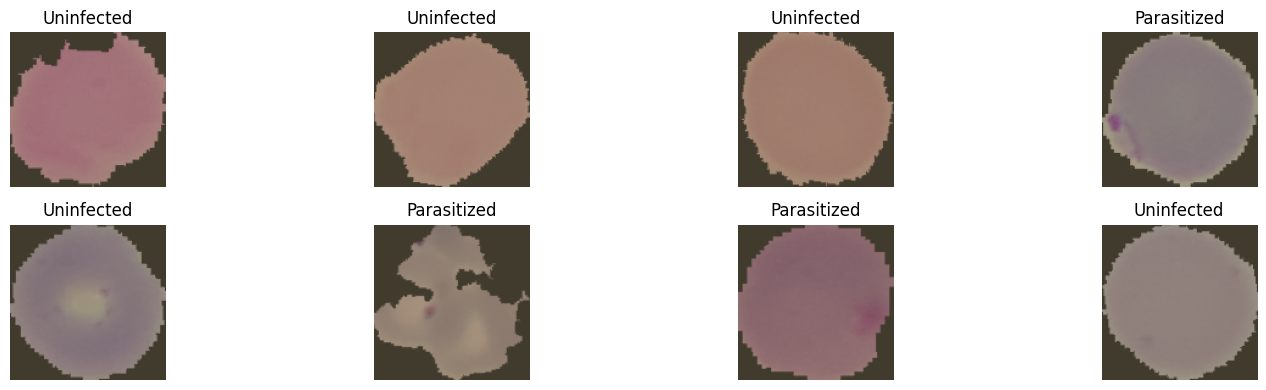

In [5]:
# 1. Initialize Loaders
train_loader, val_loader, test_loader, class_names = create_dataloaders(DATA_PATH, batch_size=32)

print(f"Classes found: {class_names}")
print(f"Training Batches: {len(train_loader)} | Validation Batches: {len(val_loader)} | Test Batches: {len(test_loader)}")

# 2. Visual Inspection (EDA)
print("\n Sample Microscopic Images (Normalized):")
plot_sample_images(train_loader, class_names)

# MODEL PREPARATION AND TRAINING

## 1 . Loading the Model

In [6]:
model = MalariaCNN().to(DEVICE)
optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

print("Model Architecture:")
print(model)

Model Architecture:
MalariaCNN(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv4): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (dropout): Dropout(p=0.5, inplace=False)
  (fc1): Linear(in_features=8192, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=2, bias=True)
)


## 2 . Training the Model

In [7]:
EPOCHS = 30
results = {
    'train_loss': [], 'train_acc': [],
    'val_loss': [], 'val_acc': []
}

print(f"Starting training for {EPOCHS} epochs...")
start_time = time()

for epoch in range(EPOCHS):
    # 1. Train
    t_loss, t_acc = train_step(model, train_loader, criterion, optimizer, DEVICE)

    # 2. Evaluate
    v_loss, v_acc = evaluate_step(model, val_loader, criterion, DEVICE)

    # 3. Log
    results['train_loss'].append(t_loss)
    results['train_acc'].append(t_acc)
    results['val_loss'].append(v_loss)
    results['val_acc'].append(v_acc)

    print(f"Epoch [{epoch+1}/{EPOCHS}] | Train Acc: {t_acc:.3f} | Val Acc: {v_acc:.3f} | Train Loss: {t_loss:.3f} | Val Loss: {v_loss:.3f}")

total_time = time() - start_time
print(f"\nTraining Complete in {total_time/60:.0f} minutes.")

Starting training for 30 epochs...


Training:   0%|          | 0/603 [00:00<?, ?it/s]

Epoch [1/30] | Train Acc: 0.884 | Val Acc: 95.084 | Train Loss: 0.270 | Val Loss: 0.148


Epoch [2/30] | Train Acc: 0.956 | Val Acc: 95.647 | Train Loss: 0.146 | Val Loss: 0.135


Epoch [3/30] | Train Acc: 0.957 | Val Acc: 95.610 | Train Loss: 0.135 | Val Loss: 0.131


Epoch [4/30] | Train Acc: 0.957 | Val Acc: 95.483 | Train Loss: 0.132 | Val Loss: 0.132


Epoch [5/30] | Train Acc: 0.957 | Val Acc: 95.719 | Train Loss: 0.132 | Val Loss: 0.131


Epoch [6/30] | Train Acc: 0.959 | Val Acc: 95.538 | Train Loss: 0.124 | Val Loss: 0.131


Epoch [7/30] | Train Acc: 0.959 | Val Acc: 95.719 | Train Loss: 0.124 | Val Loss: 0.131


Epoch [8/30] | Train Acc: 0.961 | Val Acc: 95.810 | Train Loss: 0.121 | Val Loss: 0.122


Epoch [9/30] | Train Acc: 0.961 | Val Acc: 94.685 | Train Loss: 0.116 | Val Loss: 0.136


Epoch [10/30] | Train Acc: 0.962 | Val Acc: 95.882 | Train Loss: 0.115 | Val Loss: 0.119


Epoch [11/30] | Train Acc: 0.962 | Val Acc: 95.755 | Train Loss: 0.117 | Val Loss: 0.120


Epoch [12/30] | Train Acc: 0.962 | Val Acc: 95.919 | Train Loss: 0.113 | Val Loss: 0.117


Epoch [13/30] | Train Acc: 0.962 | Val Acc: 95.991 | Train Loss: 0.111 | Val Loss: 0.121


Epoch [14/30] | Train Acc: 0.964 | Val Acc: 95.901 | Train Loss: 0.109 | Val Loss: 0.123


Epoch [15/30] | Train Acc: 0.964 | Val Acc: 96.046 | Train Loss: 0.109 | Val Loss: 0.118


Epoch [16/30] | Train Acc: 0.964 | Val Acc: 96.064 | Train Loss: 0.110 | Val Loss: 0.126


Epoch [17/30] | Train Acc: 0.964 | Val Acc: 96.118 | Train Loss: 0.106 | Val Loss: 0.118


Epoch [18/30] | Train Acc: 0.965 | Val Acc: 96.028 | Train Loss: 0.107 | Val Loss: 0.118


Epoch [19/30] | Train Acc: 0.964 | Val Acc: 96.227 | Train Loss: 0.105 | Val Loss: 0.115


Epoch [20/30] | Train Acc: 0.965 | Val Acc: 96.082 | Train Loss: 0.104 | Val Loss: 0.124


Epoch [21/30] | Train Acc: 0.965 | Val Acc: 96.155 | Train Loss: 0.102 | Val Loss: 0.112


Epoch [22/30] | Train Acc: 0.966 | Val Acc: 95.755 | Train Loss: 0.103 | Val Loss: 0.125


Epoch [23/30] | Train Acc: 0.966 | Val Acc: 96.082 | Train Loss: 0.102 | Val Loss: 0.113


Epoch [24/30] | Train Acc: 0.966 | Val Acc: 95.955 | Train Loss: 0.103 | Val Loss: 0.147


Epoch [25/30] | Train Acc: 0.966 | Val Acc: 96.136 | Train Loss: 0.104 | Val Loss: 0.114


Epoch [26/30] | Train Acc: 0.967 | Val Acc: 96.354 | Train Loss: 0.100 | Val Loss: 0.113


Epoch [27/30] | Train Acc: 0.967 | Val Acc: 95.901 | Train Loss: 0.100 | Val Loss: 0.117


Epoch [28/30] | Train Acc: 0.966 | Val Acc: 96.100 | Train Loss: 0.097 | Val Loss: 0.113


Epoch [29/30] | Train Acc: 0.967 | Val Acc: 96.300 | Train Loss: 0.099 | Val Loss: 0.111


Epoch [30/30] | Train Acc: 0.969 | Val Acc: 96.118 | Train Loss: 0.096 | Val Loss: 0.117

Training Complete in 239 minutes.


# MODEL EVALUATION

In [ ]:
# results['val_acc'] = [i/100 for i in results['val_acc']]

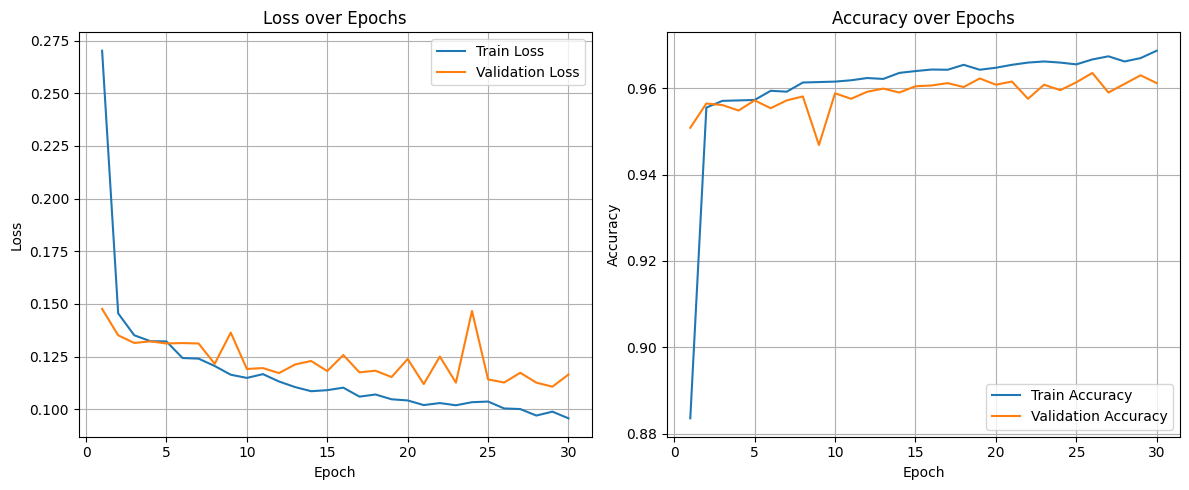

In [21]:

# Visualize Performance
plot_results(results, save=True)

# Save Model
# torch.save(model.state_dict(), 'malaria_cnn_v1.pth')
# print("Model saved to disk.")

# INFERENCE

In [9]:
# Save the trained model for future use
torch.save(model.state_dict(), 'malaria_cnn_final.pth')
print("\nModel saved to disk.")


Model saved to disk.


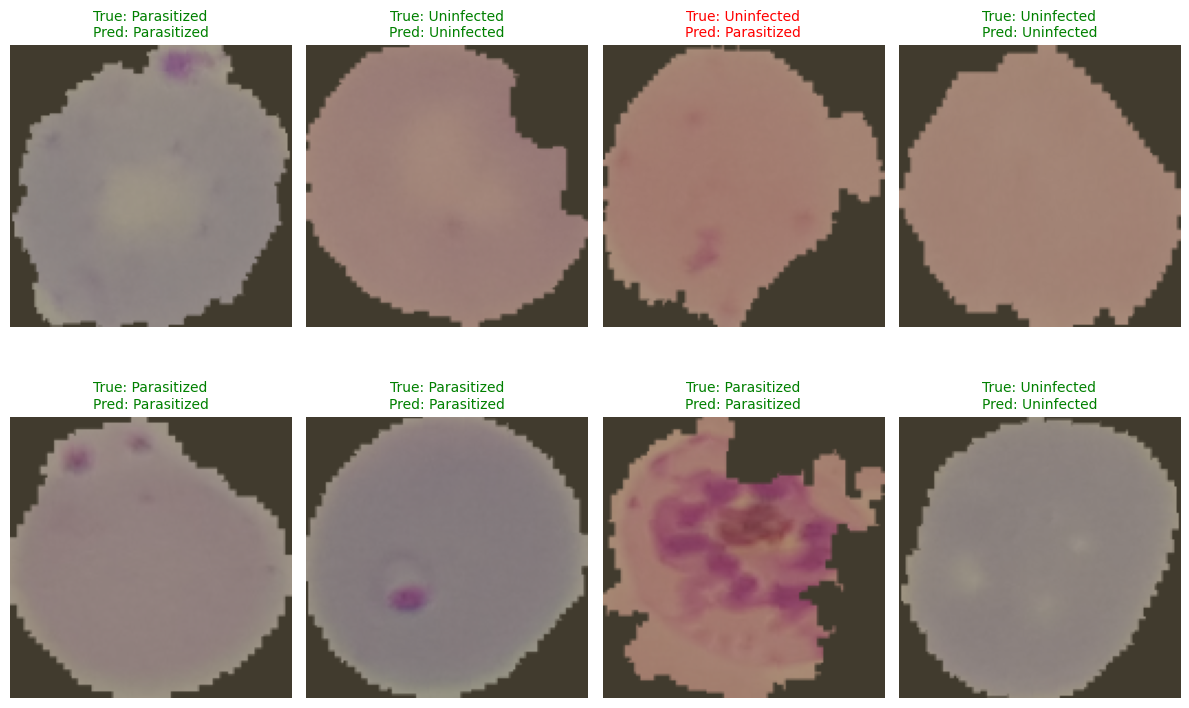

In [12]:
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.load_state_dict(torch.load('malaria_cnn_final.pth'))

# get a batch and predict on it
plot_predictions(model,test_loader,class_names, DEVICE, save=True)